In [1]:
# %matplotlib inline

import os
import re
from klusta.kwik import KwikModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from enum import Enum
from newkwikfile import KwikFile
from datasource import DataSource
from spkpop import SpkPop

### Todos animais, todos Shanks

No model has been passed. 
 You can add the models using the add_model() function.
0 unsorted models have been deleted
The following models where find in this data source:dict_keys(['2021/01/23 Shank 01', '2021/01/23 Shank 02', '2021/01/23 Shank 03', '2021/01/23 Shank 04', '2021/01/23 Shank 05', '2021/01/24 Shank 03', '2021/01/24 Shank 04', '2021/01/24 Shank 05', '2021/01/24 Shank 06', '2021/02/07 Shank 03', '2021/02/07 Shank 04', '2021/02/07 Shank 05', '2021/02/07 Shank 06', '2021/02/13 Shank 03', '2021/02/13 Shank 04', '2021/02/13 Shank 05', '2021/02/13 Shank 06'])
ploting population of : 2021/01/23 Shank 01
ploting SUA of : 2021/01/23 Shank 01
ploting cluster nº 2 with 412 spikes
error in cluster 2 : can only concatenate str (not "int") to str
ploting cluster nº 36 with 398 spikes
error in cluster 36 : can only concatenate str (not "int") to str
ploting cluster nº 5 with 11878 spikes
error in cluster 5 : can only concatenate str (not "int") to str
ploting cluster nº 7 with 4532 spik

d:\Workspace\TCC\TCC\spkpop.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  cluster_fig = plt.figure(figsize=[12,4])


ploting cluster nº 21 with 5558 spikes
error in cluster 21 : can only concatenate str (not "int") to str
ploting cluster nº 26 with 21228 spikes
error in cluster 26 : can only concatenate str (not "int") to str
ploting cluster nº 27 with 1733 spikes
error in cluster 27 : can only concatenate str (not "int") to str
ploting cluster nº 31 with 75546 spikes
error in cluster 31 : can only concatenate str (not "int") to str
ploting population of : 2021/01/23 Shank 02
ploting SUA of : 2021/01/23 Shank 02
ploting cluster nº 32 with 311 spikes
error in cluster 32 : can only concatenate str (not "int") to str
ploting cluster nº 2 with 548 spikes
error in cluster 2 : can only concatenate str (not "int") to str
ploting cluster nº 34 with 402 spikes
error in cluster 34 : can only concatenate str (not "int") to str
ploting cluster nº 13 with 5258 spikes
error in cluster 13 : can only concatenate str (not "int") to str
ploting cluster nº 3 with 51996 spikes
error in cluster 3 : can only concatenate s

KeyboardInterrupt: 

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

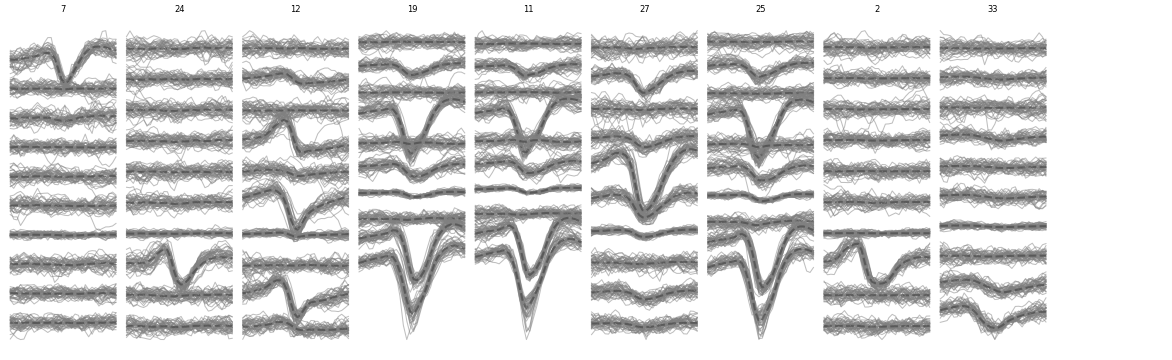

In [2]:
datasource = DataSource()
kpath = 'LDT-local'
model_names = datasource.load_database(kpath)
population = SpkPop(datasource)
results_path = 'Results'
population.all_database_united_plots(result_path=results_path)

In [ ]:
datasource = DataSource()

animais = os.listdir(kpath)
for animal in animais:
    shanks = os.listdir(kpath + '/' + animal)
    for shank in shanks:
        if shank.endswith('.kwik'):
           datasource.add_model(path = (kpath + '/' + animal + '/' + shank), name = (animal.replace('-','/') + ' Shank ' + shank.split('.')[0].split('_')[-1][1:]))

### testing kwikfile functions

In [ ]:
names = datasource.model_names
names

exemplo de utilização das funções de um modelo

In [ ]:
# for name in names:
#     spk = datasource.models[name].get_spike_times(a = 1000, b = 4000, return_mode = 'list')
#     clu = datasource.models[name].get_spike_clusters(a = 1000, b = 1100, clu_list = [3,2,11], return_mode = 'list')
#     clusters = datasource.models[name].get_clusters
#     num_of_chanels = datasource.models[name].num_of_channels()
#     groups = datasource.models[name].groups()
#     non_noise = datasource.models[name].list_of_non_noisy_groups()
#     list_groups = datasource.models[name].list_of_groups()
#     spk_count = datasource.models[name].get_spikes_count(a = 1000, b = 4000)

### removing unsorted models

In [ ]:
datasource.delete_unsorted_models()

In [ ]:
for name in datasource.model_names:
    groups = datasource.models[name].list_of_groups()
    print(f'Name: {name} | Groups:{groups}')

### Testing datasource function

In [ ]:
# for name in datasource.model_names:
#     fr = datasource.inst_fr(model_name=name,a = 1000 , b = 4000, clu_list = [2])
#     print(len(fr))
#     cv = datasource.get_CV(a = 1000, b = 4000)
#     isi = datasource.get_isi(model_name=name,b=4000)

In [ ]:
# name = datasource.model_names[0]
# clusters = datasource.models[name].get_clusters()
# for clu in clusters:
#     spk = datasource.single_unit_spikes(model_name=name,unit_id=clu)
#     cont = range(len(spk))
#     spk = pd.Series(cont, index = spk)
#     spk.plot()

In [ ]:
# for name in datasource.model_names:
#     print(f'Name: {name}')
#     mua,clusters = datasource.get_MUA(model_name=name)
#     print(f'Nº of MUA: {len(mua)} | MUA: {clusters}')
#     for clu in clusters:
#         datasource.isMUA(clu,model_name = name)
#     sua, clusters = datasource.get_SUA(model_name=name)
#     for clu in clusters:
#         datasource.isSUA(clu,model_name = name)
#     print(f'Nº of SUA: {len(sua)} | SUA: {clusters}')

In [ ]:
# for name in datasource.model_names:
#     ids = datasource.unit_ids(model_name=name)
#     groups = datasource.models[name].groups()
#     print(f'Non Noise clusters: {list(ids.index)}')

In [ ]:
# for name in datasource.model_names:
#     print(f'Name: {name}')
#     mua = datasource.number_of_MUA(model_name=name)
#     sua = datasource.number_of_SUA(model_name=name)
#     fr_MUA = datasource.firing_rate_of_MUA(model_name = name,  b = 4000)
#     fr_SUA = datasource.firing_rate_of_SUA(model_name = name, b = 4000)
#     print(f'Fire rate of MUA {fr_MUA} | SUA:{fr_SUA}')
#     print(f'Number of MUA: {mua} | Number of SUA: {sua}')

In [ ]:
# for name in datasource.model_names:
#     print(name)
#     _,sua = datasource.get_SUA(model_name=name)
#     print('SUA')
#     for clu in sua:
#         print(f'Clu {clu}: {datasource.get_cluster_contamination(clu,model_name=name)}')
#     _,mua = datasource.get_MUA(model_name=name)
#     print('MUA')
#     for clu in mua:
#         print(f'Clu {clu}: {datasource.get_cluster_contamination(clu,model_name=name)}')

In [ ]:
# for name in datasource.model_names:
#     print(name)
#     _,SUA = datasource.get_SUA(model_name=name)
#     sua_contamination = datasource.get_group_contamination(SUA,model_name=name)
#     print(f'SUA contamination: {sua_contamination}')
#     _,MUA = datasource.get_MUA(model_name=name)
#     mua_contamination = datasource.get_group_contamination(MUA,model_name=name) 
#     print(f'MUA contamination: {mua_contamination}')   

### Producing a summary of a shank

In [ ]:
population = SpkPop(datasource)

In [ ]:
names = population.data_source.model_names
names

In [ ]:
name = names[1]
name

### funções prontas

In [ ]:
a = None
b= 4600
non_noisy = population.data_source.models[name].get_non_noisy_clusters()
duration = population.data_source.models[name].duration()
population_FR = population.data_source.firing_rate_of_population(model_name=name,b=b)
N_MUA = population.data_source.number_of_MUA(model_name=name)
N_SUA = population.data_source.number_of_SUA(model_name=name)
FR_SUA = population.data_source.firing_rate_of_SUA(model_name=name)
FR_MUA = population.data_source.firing_rate_of_MUA(model_name=name)
contamination = population.data_source.get_group_contamination(non_noisy,model_name=name)
print(f'Name: {name}')
print(f'Duration: {duration:.2f} s')
print(f'population FR: {population_FR:.2f}')
print(f'Number of SUA: {N_SUA}')
print(f'Fire rate of SUA:{FR_SUA:.2f}')
print(f'Number of MUA: {N_MUA}')
print(f'Fire RAte of MUA:{FR_MUA:.2f}')
print(f'Contamination: {contamination:.2f} %')

In [ ]:
population.plot_ifr(model_name=name,bin_size=10,vertical_line=3600)

In [ ]:
population.plot_ifr(model_name=name,a=3000,b=4200,bin_size=10,vertical_line=3600)

In [ ]:
a = 3000
b = 4200
bin_size = 50e-3
population.plot_cv(model_name=name,a=a,b=b,bin_size=bin_size,vertical_line=3600)

In [ ]:
bin_size = 50e-3
population.plot_cv(model_name=name,bin_size=bin_size,vertical_line=3600)

In [ ]:
bin_size = 50e-4
max_value =1
population.plot_isi(model_name=name,a=a, b =b,bin_size =bin_size,max_isi_value= max_value)
population.plot_isi(model_name=name,a=a,b=3600,bin_size =bin_size,max_isi_value= max_value)
population.plot_isi(model_name=name,a=3600,b=b,bin_size =bin_size,max_isi_value= max_value)

In [ ]:
clu_list = None
population.box_plot_fr(model_name=name,clu_list = clu_list, a = a, b = b)

In [ ]:
population.plot_cluster_waveforms(model_name=name,nspikes=40)

### in development

In [ ]:
name = names[1]
population.plot_best_cluster_waveforms(model_name=name,clu_idx = 0, cluster_list = None,nspikes = 50, save_path=None, wave_color="gray")

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        # ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        # ax.tick_params(labelbottom=False, labelleft=False)]
        if i%2 == 0:
            exemplo = np.random.randn(100)
            ax.plot(exemplo)
        else:
            ax.hist(exemplo, bins=5,histtype='step',orientation=u'horizontal')

fig = plt.figure(figsize=[12,12])
fig.suptitle("Teste de plot com gridspec")

gs = GridSpec(3, 3,wspace= 0.05)
gssub = gs[0:3].subgridspec(1, 2,width_ratios = [3,1],wspace = 0.0)
gssub2 = gs[3:6].subgridspec(1, 2,width_ratios = [3,1],wspace = 0.0)
ax1 = fig.add_subplot(gssub[0])
ax11 = fig.add_subplot(gssub[1])
ax2 = fig.add_subplot(gssub2[0])
ax22 = fig.add_subplot(gssub2[1])
ax3 = fig.add_subplot(gs[6])
ax4 = fig.add_subplot(gs[7])
ax5 = fig.add_subplot(gs[8])

annotate_axes(fig)